# Data

In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

import numpy as np
import random

In [3]:
train_dir = "./MarsRoverDataset/Train"
test_dir = "./MarsRoverDataset/Test"

In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary",
    batch_size=16,
    image_size=(180,180),
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="binary",
    batch_size=16,
    image_size=(180, 180),
    shuffle=True,
    seed=123
)

Found 97 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


In [5]:
class_names = train_dataset.class_names
print("Klassen:", class_names)

Klassen: ['FreePath', 'Obstacles']


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [7]:
unbatched_dataset = train_dataset.unbatch()
unbatched_images = []
unbatched_labels = []

for image, label in unbatched_dataset:
    unbatched_images.append(image)
    unbatched_labels.append(label)

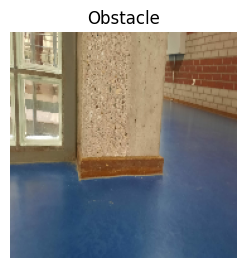

In [8]:
import matplotlib.pyplot as plt

random_image = random.randint(0, len(unbatched_images))

plt.figure(figsize=(10,10))
ax = plt.subplot(3, 3, 1)
plt.imshow(unbatched_images[random_image].numpy())
label = "FreePath" if unbatched_labels[random_image] == 0 else "Obstacle"
plt.title(label)
plt.axis("off")
plt.show()

# Neuraal Netwerk

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
num_classes = 2
input_shape = (180, 180, 3)

model = Sequential([
    keras.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="sigmoid")
])

In [19]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)             

In [20]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=4
)

Epoch 1/4


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

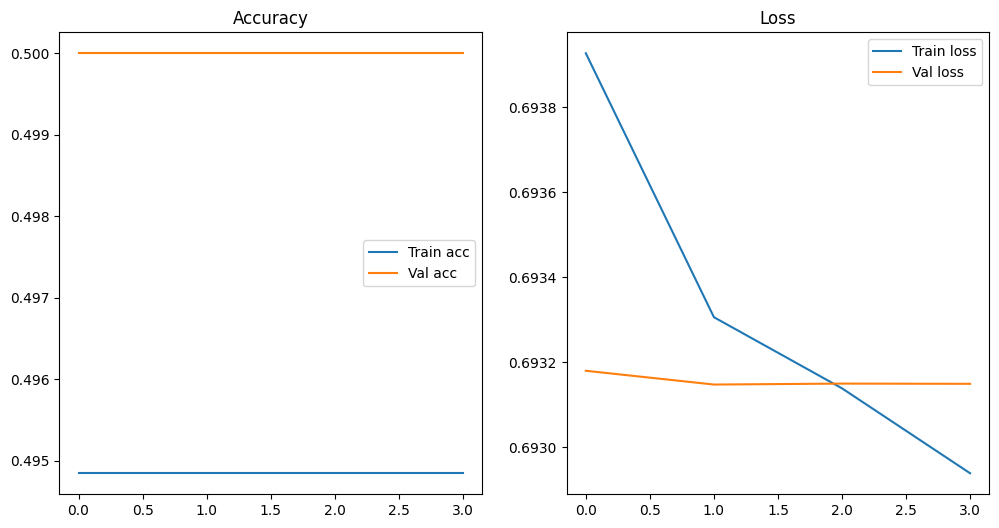

In [13]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train acc")
plt.plot(epochs_range, val_acc, label="Val acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train loss")
plt.plot(epochs_range, val_loss, label="Val loss")
plt.legend()
plt.title("Loss")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


C:\Users\Sven Deijkers\Documents\Programming\CodeProjects\JupyterProjects\ai-env\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


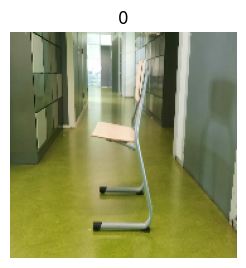

In [14]:
unbatched_test = list(test_dataset.unbatch().as_numpy_iterator())
random_image, random_label = random.choice(unbatched_test)

img_batch = np.expand_dims(random_image, axis=0)

predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions[0])

class_names = ["FreePath", "Obstacle"]

for images, labels in test_dataset.take(1):
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(3, 3, 1)
    plt.imshow(random_image)
    plt.title(predicted_class)
    plt.axis("off")
    plt.show()